In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
cleveland_data = pd.read_csv('processed.cleveland.data', header=None, names=column_names, na_values="?")

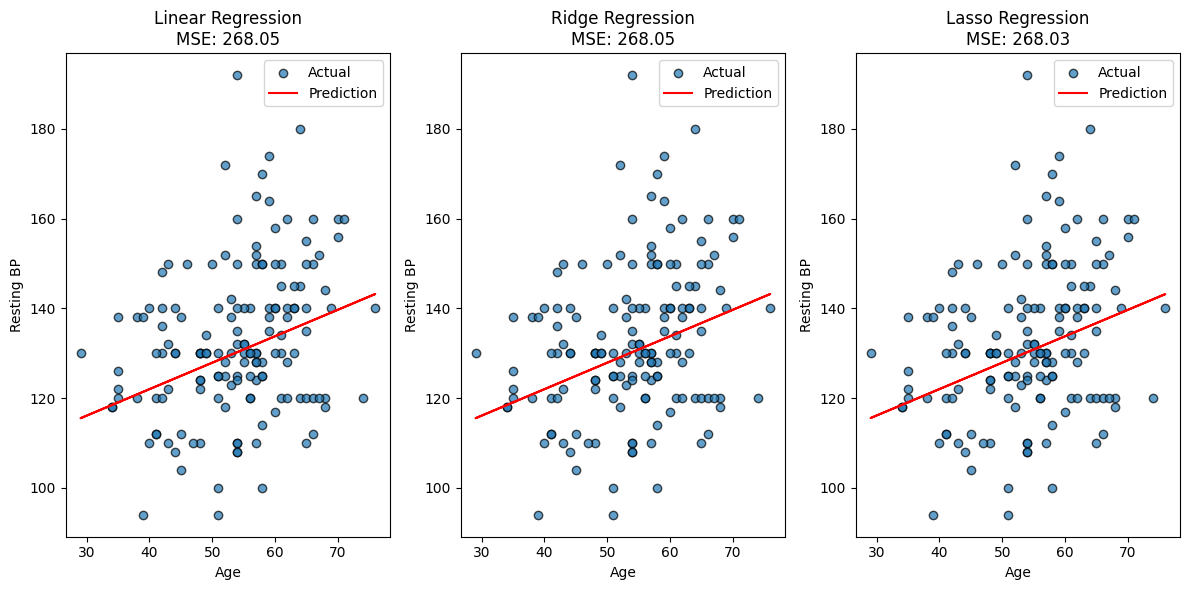

Найкраща модель: Lasso Regression з MSE = 268.03


In [12]:
X = cleveland_data[['age']].values
y = cleveland_data['trestbps'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Навчання моделей 
mse_scores = {}
plt.figure(figsize=(12, 6))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    
    plt.subplot(1, 3, i)
    plt.scatter(X_test, y_test, label="Actual", alpha=0.7, edgecolor='black')
    plt.plot(X_test, y_pred, label="Prediction", color='red')
    plt.title(f"{name}\nMSE: {mse_scores[name]:.2f}")
    plt.xlabel('Age')
    plt.ylabel('Resting BP')
    plt.legend()

plt.tight_layout()
plt.show()

best_model = min(mse_scores, key=mse_scores.get)
print(f"Найкраща модель: {best_model} з MSE = {mse_scores[best_model]:.2f}")
